# Prediksi Cuaca Hari Besok di Australia

## Data Preparation

### Import Library

In [1]:
#Import libary-libary yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Menampilkan Data

In [2]:
#Menload data
df =pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#Menload data per kolom
dt =pd.read_csv("weatherAUS.csv", usecols=['Rainfall','Location','WindGustDir'])
dt

,Location,Rainfall,WindGustDir
0,Albury,0.6,W
1,Albury,0.0,WNW
2,Albury,0.0,WSW
3,Albury,0.0,NE
4,Albury,1.0,W
...,...,...,...
145455,Uluru,0.0,E
145456,Uluru,0.0,NNW
145457,Uluru,0.0,N
145458,Uluru,0.0,SE


### Menampilkan informasi data

In [4]:
#Mengecek kolom dan baris data
df.shape

(145460, 23)

In [5]:
#Menampilkan data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#Menampilkan data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
#Menampilkan info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#Menampilkan deskripsi data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#Mengecek nilai modus
print(df.loc[:, "WindGustDir"].mode())
print(df.loc[:, "WindDir9am"].mode())
print(df.loc[:, "WindDir3pm"].mode())
print(df.loc[:, "RainToday"].mode())
print(df.loc[:, "RainTomorrow"].mode())

0    W
dtype: object
0    N
dtype: object
0    SE
dtype: object
0    No
dtype: object
0    No
dtype: object


### Melihat nilai unique 

In [10]:
#Melihat nilai unique setiap kolom 
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

### Mencari variabel categorical

In [14]:
# Melihat data kategorikal

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Text(0.5, 1.0, 'type of our data ')

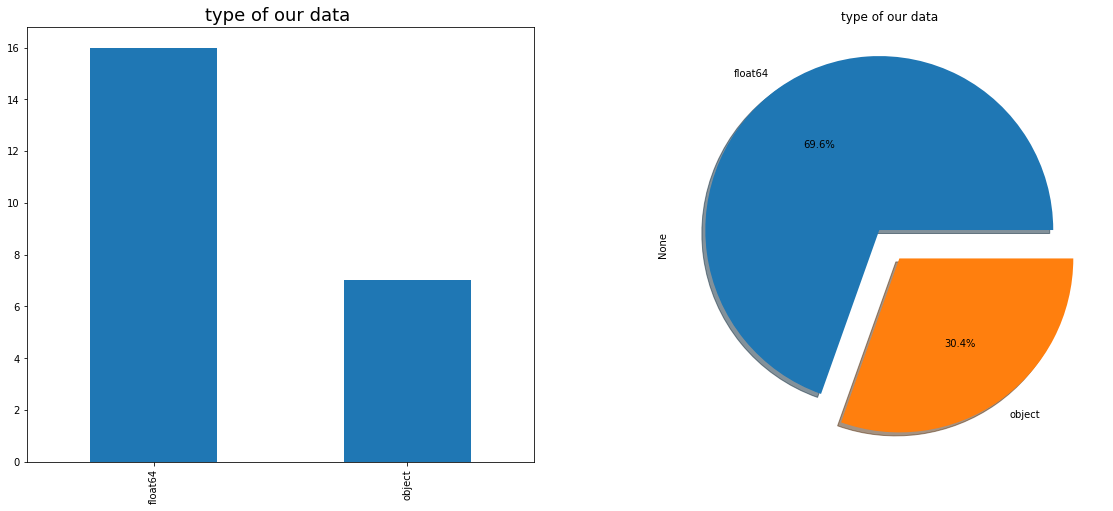

In [15]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [16]:
# Meliat data cardinal di kategorikal variabel 

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model.
We can see that there is a Date variable which needs to be preprocessed. The preprocessing will do in the following section.

### Menampilkan nilai kolerasi data

In [17]:
#Menampilkan kolerasi dari semua kolom data
kolerasi=df.corr()
kolerasi

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


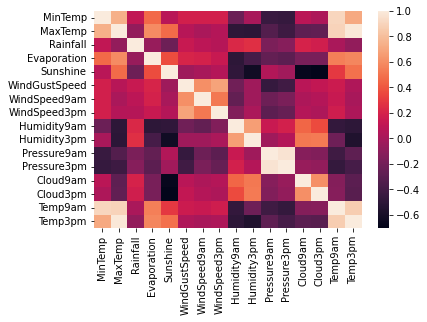

In [18]:
#Menampilkan kolerasi data
import seaborn as sns
sns.heatmap(kolerasi);

### Melihat korelasi suatu kolom dengan kolom lain

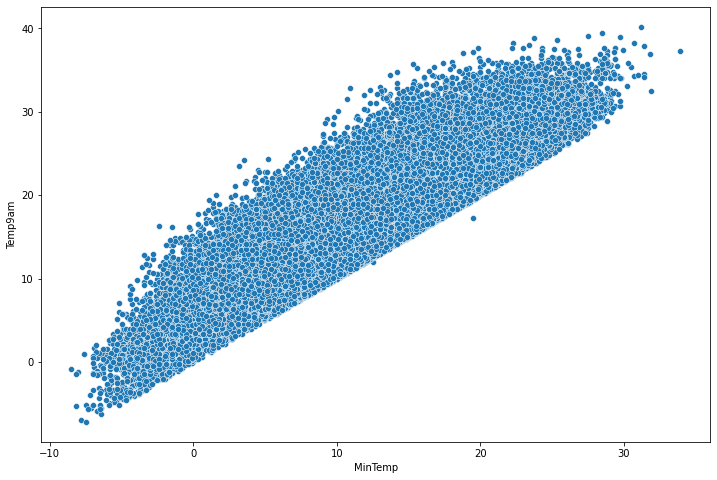

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['Temp9am'],  x = df['MinTemp'])
plt.show()

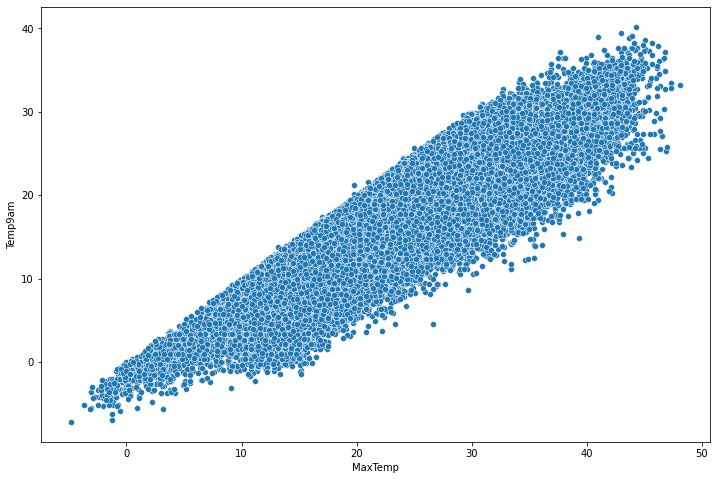

In [20]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['Temp9am'],  x = df['MaxTemp'])
plt.show()

### Membuat histogram data

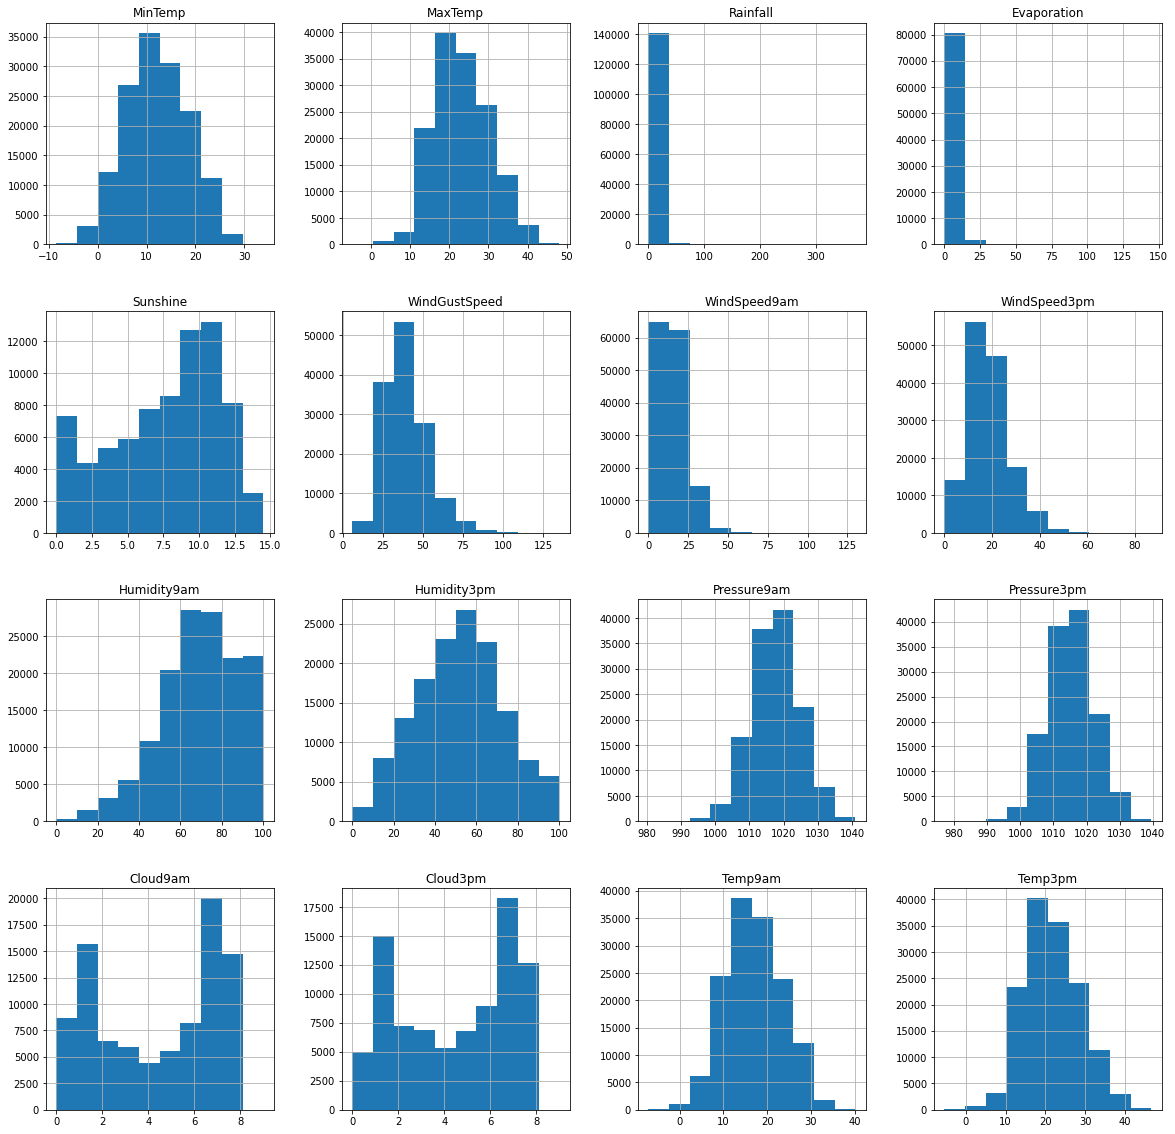

In [21]:
#Menampilkan histogram data 
df.hist(bins=10, figsize=(20,20))

plt.show()

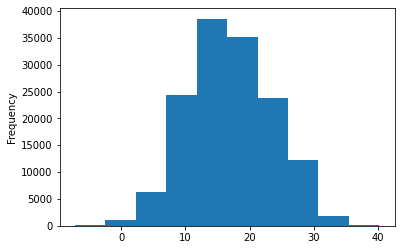

In [22]:
#Menampilkan histogram kolom 
df['Temp9am'].plot.hist(bins=10)

plt.show()

### Menampilkan standar deviasi dan varians

In [23]:
#Standar deviasi
print(df.loc[:].std())
#Varians
print(df.loc[:].var())

MinTemp           6.398495
MaxTemp           7.119049
Rainfall          8.478060
Evaporation       4.193704
Sunshine          3.785483
WindGustSpeed    13.607062
WindSpeed9am      8.915375
WindSpeed3pm      8.809800
Humidity9am      19.029164
Humidity3pm      20.795902
Pressure9am       7.106530
Pressure3pm       7.037414
Cloud9am          2.887159
Cloud3pm          2.720357
Temp9am           6.488753
Temp3pm           6.936650
dtype: float64
MinTemp           40.940738
MaxTemp           50.680856
Rainfall          71.877497
Evaporation       17.587154
Sunshine          14.329881
WindGustSpeed    185.152144
WindSpeed9am      79.483917
WindSpeed3pm      77.612576
Humidity9am      362.109100
Humidity3pm      432.469526
Pressure9am       50.502773
Pressure3pm       49.525193
Cloud9am           8.335686
Cloud3pm           7.400344
Temp9am           42.103917
Temp3pm           48.117120
dtype: float64


C:\Users\admin\AppData\Local\Temp/ipykernel_13936/903137451.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.loc[:].std())
C:\Users\admin\AppData\Local\Temp/ipykernel_13936/903137451.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.loc[:].var())


### Menampilkan informasi grafik

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp', ylabel='count'>

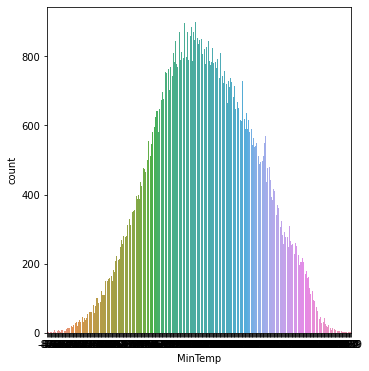

In [24]:
#Menampilkan informasi kolom Date dalam bentuk Grafik
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['MinTemp'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

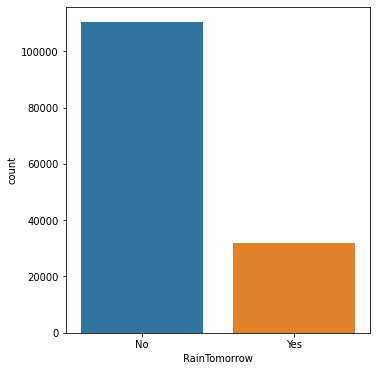

In [25]:
#Menampilkan informasi kolom Date dalam bentuk Grafik
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['RainTomorrow'])

### Pair plot

In [26]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

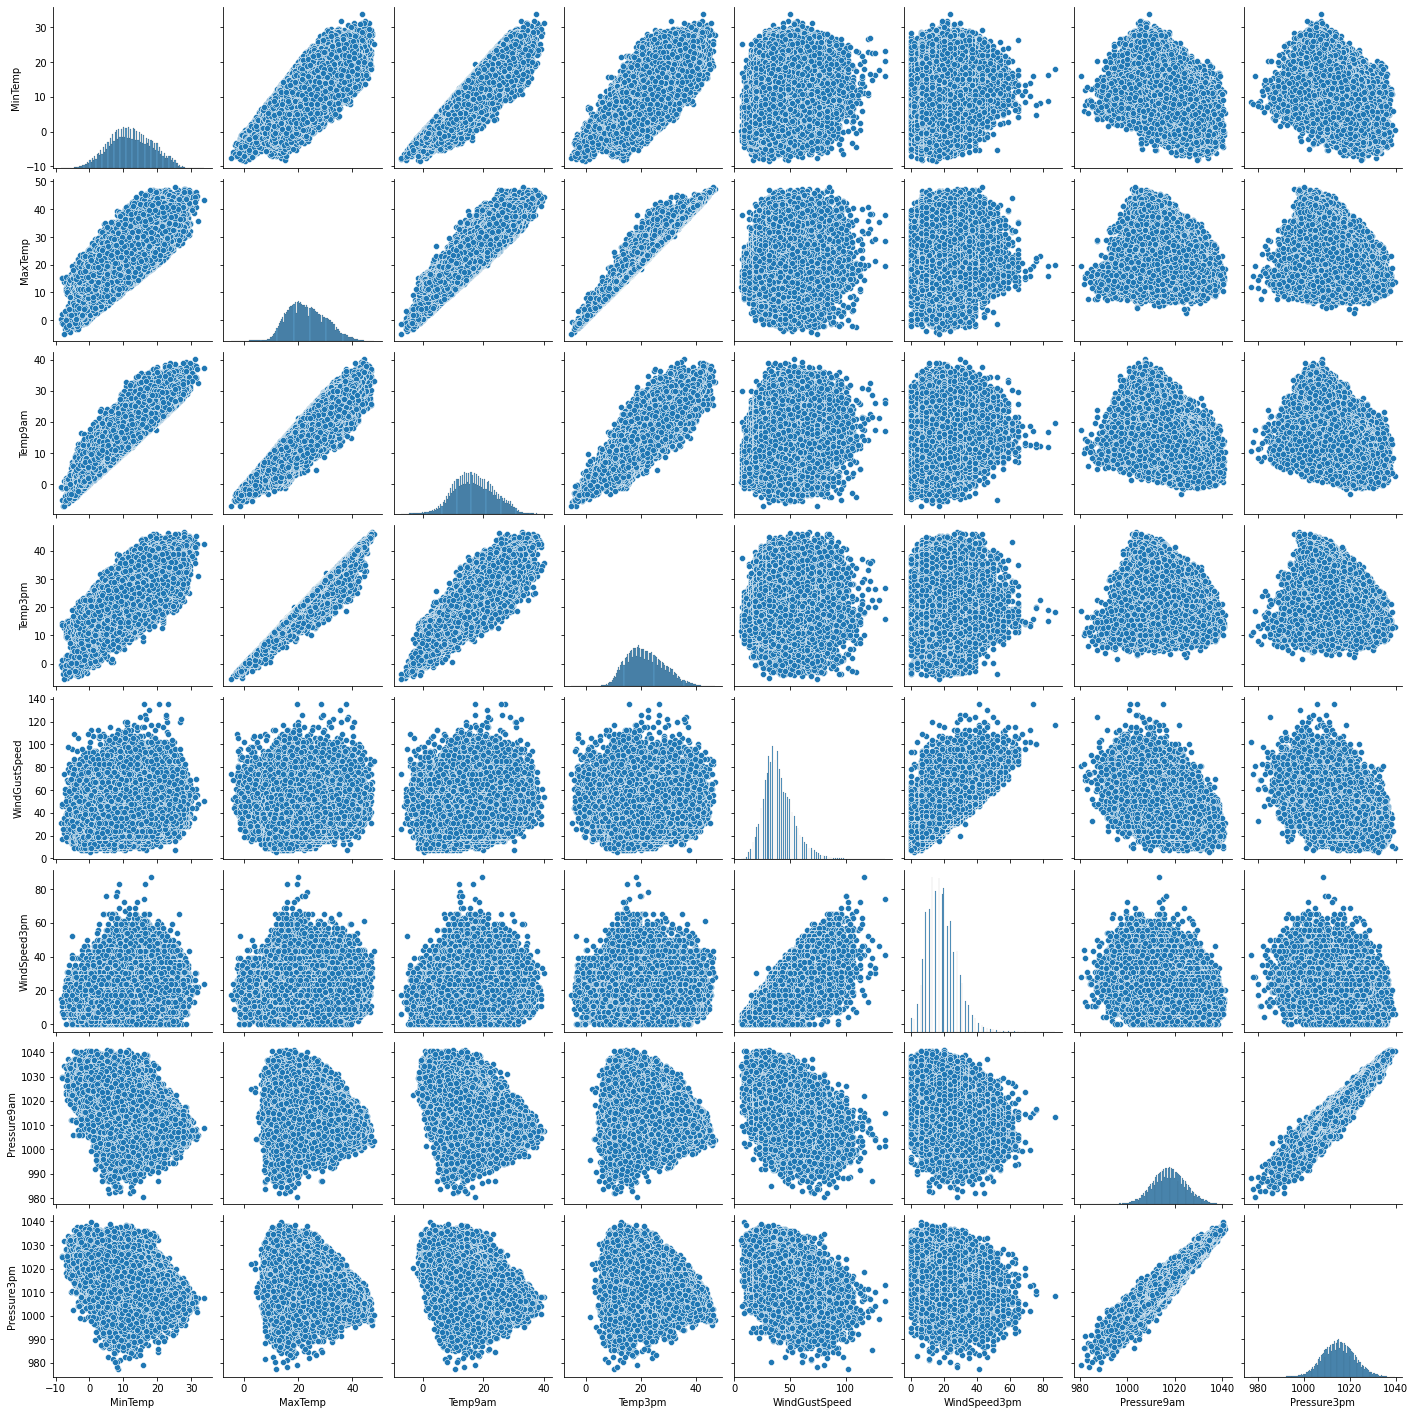

In [27]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

### Mengidentifikasi outliers

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [29]:
(print(df <(Q1 - 1.5*IQR)) | (Q3 + 1.5*IQR))

C:\Users\admin\AppData\Local\Temp/ipykernel_13936/993930909.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (print(df <(Q1 - 1.5*IQR)) | (Q3 + 1.5*IQR))


        Cloud3pm  Cloud9am   Date  Evaporation  Humidity3pm  Humidity9am  \
0          False     False  False        False        False        False   
1          False     False  False        False        False        False   
2          False     False  False        False        False        False   
3          False     False  False        False        False        False   
4          False     False  False        False        False        False   
...          ...       ...    ...          ...          ...          ...   
145455     False     False  False        False        False        False   
145456     False     False  False        False        False        False   
145457     False     False  False        False        False        False   
145458     False     False  False        False        False        False   
145459     False     False  False        False        False        False   

        Location  MaxTemp  MinTemp  Pressure3pm  ...  Rainfall  Sunshine  \
0          

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [NoneType]

Text(0, 0.5, 'WindSpeed3pm')

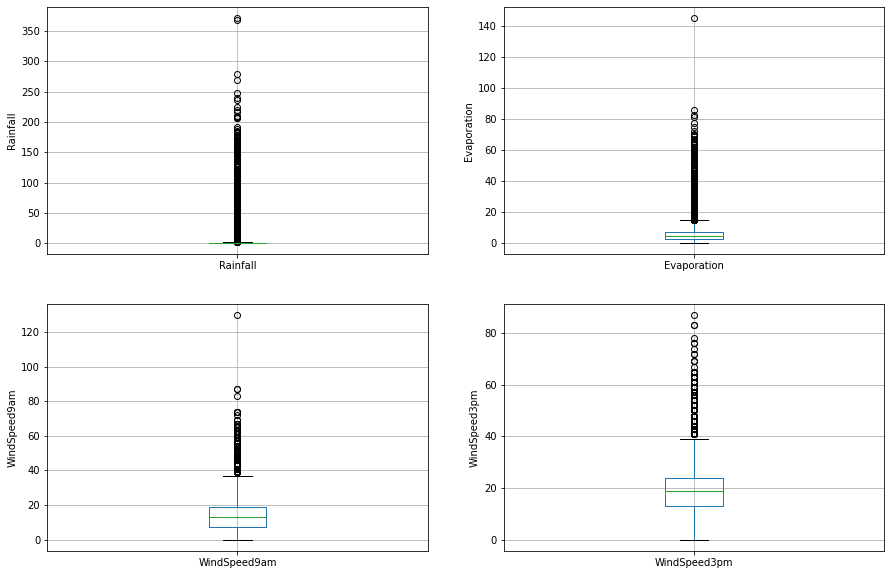

In [30]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### Mengidentifikasi missing value

In [31]:
#Mengcek Missing Value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Keterangan : Pada kolom Rainfall, RainToday, dan RainTomorrow terjadi missing value (nilai hilang)

## Data Preprocessing

### Data Cleaning (Penyelesaian Missing Value)

In [32]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode())
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode())
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode())

In [33]:
#Mengcek kembali missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [34]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Keterangan : Kami telah melakukan penyelesaian missing value yaitu dengan cara mengganti nilai yang hilang dengan nilai yang sering muncul pada masing-masing kolom.

In [35]:
#Mengecek kembali info data setelah dilakbukan penyelesaian missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

### Mengencoding Data Kategori menjadi Numerik menggunakan LabelEncoder

In [36]:
#Mengganti tipe data String menjadi numerik pada kolom Location

label_encoder = LabelEncoder()
df['Date'] = label_encoder.fit_transform(df['Date'])
label_encoder.classes_

array(['2007-11-01', '2007-11-02', '2007-11-03', ..., '2017-06-23',
       '2017-06-24', '2017-06-25'], dtype=object)

In [37]:
#Mengganti tipe data String menjadi numerik pada kolom Location

label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
label_encoder.classes_

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [38]:
#Mengganti tipe data String menjadi numerik pada kolom Date

label_encoder = LabelEncoder()
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
label_encoder.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object)

In [39]:
#Mengganti tipe data String menjadi numerik pada kolom RainToday

label_encoder = LabelEncoder()
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
label_encoder.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object)

In [40]:
#Mengganti tipe data String menjadi numerik pada kolom RainToday

label_encoder = LabelEncoder()
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
label_encoder.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object)

In [41]:
#Mengganti tipe data String menjadi numerik pada kolom RainToday

label_encoder = LabelEncoder()
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
label_encoder.classes_

array(['No', 'Yes', nan], dtype=object)

In [42]:
#Mengganti tipe data String menjadi numerik pada kolom RainTomorrow

label_encoder = LabelEncoder()
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
label_encoder.classes_

array(['No', 'Yes', nan], dtype=object)

Keterangan :
    0 ------------> No
    1 ------------> Yes

In [43]:
#Mengcek kembali informasi data setelah melakukan encoding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int32  
 1   Location       145460 non-null  int32  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

## Train dan Test

### Train dan Test Split

In [44]:
#Mendifinisikan nilai X dan y
x = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [45]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
#Training 80%
print(x.shape)
print(x_train.shape)
print(x_test.shape)

#Testing 20%
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(145460, 22)
(116368, 22)
(29092, 22)
(145460,)
(116368,)
(29092,)


In [47]:
x_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
22926,2234,27,18.8,23.7,0.2,5.000000,7.300000,2,52.0,2,...,28.0,74.0,73.0,1016.6,1013.9,5.000000,7.00000,21.4,22.2,0
80735,3173,44,9.3,24.0,0.2,1.600000,10.900000,4,48.0,6,...,24.0,74.0,55.0,1018.3,1014.6,3.000000,5.00000,14.3,23.2,0
121764,1369,31,10.9,22.2,1.4,1.200000,9.600000,12,26.0,16,...,11.0,85.0,47.0,1017.6,1014.9,1.000000,2.00000,16.6,21.5,1
139821,953,13,19.3,29.9,0.0,9.200000,11.000000,2,43.0,2,...,17.0,44.0,37.0,1015.9,1012.1,1.000000,1.00000,23.2,29.1,0
1867,2263,2,15.7,17.6,12.4,5.468232,7.611178,0,20.0,2,...,13.0,100.0,100.0,1015.2,1010.5,8.000000,8.00000,16.5,17.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,2882,45,17.8,38.1,0.0,26.000000,7.611178,4,39.0,5,...,13.0,61.0,30.0,1014.5,1009.7,1.000000,1.00000,25.4,36.8,0
97639,1562,0,12.5,27.3,0.0,5.468232,10.000000,13,30.0,16,...,13.0,60.0,32.0,1019.2,1017.3,4.447461,4.50993,17.0,26.5,0
95939,3055,39,17.0,29.8,0.0,5.600000,7.611178,1,22.0,7,...,13.0,77.0,54.0,1019.6,1016.1,4.447461,4.50993,24.1,29.0,0
117952,750,32,11.9,22.0,3.8,6.200000,7.700000,11,35.0,10,...,24.0,55.0,49.0,1020.0,1018.5,7.000000,6.00000,17.1,19.7,1


### Standart Scalling


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

In [49]:
df

array([[-1.73164014, -1.53166617,  0.18944661, ...,  0.01702323,
        -0.53986047, -0.53986093],
       [-1.73051017, -1.53166617, -0.75310073, ...,  0.38198495,
        -0.53986047, -0.53986093],
       [-1.72938021, -1.53166617,  0.110901  , ...,  0.22140179,
        -0.53986047, -0.53986093],
       ...,
       [ 1.7000566 ,  1.20928479, -1.06728318, ...,  0.64475739,
        -0.53986047, -0.53986093],
       [ 1.70118656,  1.20928479, -0.69026424, ...,  0.63015892,
        -0.53986047, -0.53986093],
       [ 1.70231653,  1.20928479,  0.42508345, ..., -0.11436299,
        -0.53986047,  3.54897669]])

### Model Training Menggunakan LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

### Accuracy Score

In [52]:
#Akurasi dari Training Data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [53]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8197270727347724


Keterangan : Jadi nilai akurasi model yang kami lakukan yaitu sebesar (0,81) yang dipresentasekan sebesar 79%

In [54]:
#Akurasi dari Test Data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [55]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.8200192492781521


Keterangan : Jadi nilai akurasi model yang kami lakukan yaitu sebesar (0,82) yang dipresentasekan sebesar 79%

# Predictive System

In [56]:
input_data = (396,2,6,0)

#input data ke numpy array
input_data_as_numpy_array= np.asarray(input_data)

#input data reshaped
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('Perkiraan hari besok tidak akan hujan')
else:
    print('Perkiraan hari besok akan terjadi hujan ')

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but LogisticRegression is expecting 22 features as input.

Keterangan : Ini system yang memprediksi apakah hari berikutnya hujan atau tidak dengan menginputkan data dati dataset yang telah proses.